In [50]:
#lab 1
graph = { 
'A' : ['B','C'], 
'B' : ['D', 'E'],
'C' : ['F'], 
'D' : [], 
'E' : ['F'], 
'F' : [] 
} 
print(graph)
visited = set() # Set to keep track of visited nodes of graph. 
def dfs(visited, graph, node): #function for dfs 
    if node not in visited: 
        print (node) 
        visited.add(node) 
        for neighbour in graph[node]: 
            dfs(visited, graph, neighbour) 
# Driver Code 
print("Following is the Depth-First Search") 
dfs(visited, graph, 'A') 


{'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['F'], 'D': [], 'E': ['F'], 'F': []}
Following is the Depth-First Search
A
B
D
E
F
C


In [51]:
#lab -2

graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node): #function for BFS
  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0) 
    print (m, end = " ") 

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)


print("Following is the Breadth-First Search")
bfs(visited, graph, '5')


Following is the Breadth-First Search
5 3 7 2 4 8 

In [52]:
# lab-4
# Python3 program to solve Snake in a Maze  
# problem using backracking  
  
# Maze size 
N = 4
  
# A utility function to print solution matrix sol 
def printSolution( sol ): 
      
    for i in sol: 
        for j in i: 
            print(str(j) + " ", end="") 
        print("") 
  
# A utility function to check if x,y is valid 
# index for N*N Maze 
def isSafe( maze, x, y ): 
      
    if x >= 0 and x < N and y >= 0 and y < N and maze[x][y] == 1: 
        return True
      
    return False
""" This function solves the Maze problem using Backtracking.  
It mainly uses solveMazeUtil() to solve the problem. It  
    returns false if no path is possible, otherwise return  
    true and prints the path in the form of 1s. Please note 
    that there may be more than one solutions, this function 
    prints one of the feasable solutions. """
def solveMaze( maze ): 
      
    # Creating a 4 * 4 2-D list 
    sol = [ [ 0 for j in range(4) ] for i in range(4) ] 
      
    if solveMazeUtil(maze, 0, 0, sol) == False: 
        print("Solution doesn't exist"); 
        return False
      
    printSolution(sol) 
    return True
      
# A recursive utility function to solve Maze problem 
def solveMazeUtil(maze, x, y, sol): 
      
    #if (x,y is goal) return True 
    if x == N - 1 and y == N - 1:
        sol[x][y] = 1
        return True
          
    # Check if maze[x][y] is valid 
    if isSafe(maze, x, y) == True: 
        # mark x, y as part of solution path 
        sol[x][y] = 1
          
        # Move forward in x direction 
        if solveMazeUtil(maze, x + 1, y, sol) == True: 
            return True
              
        # If moving in x direction doesn't give solution  
        # then Move down in y direction 
        if solveMazeUtil(maze, x, y + 1, sol) == True: 
            return True
          
        # If none of the above movements work then  
        # BACKTRACK: unmark x,y as part of solution path 
        sol[x][y] = 0
        return False
  
# Driver program to test above function 
if __name__ == "__main__": 
# Initialising the maze 
    maze = [ [1, 0, 0, 0], 
             [1, 1, 0, 1], 
             [0, 1, 0, 0], 
             [1, 1, 1, 1] ] 
               
    solveMaze(maze) 



1 0 0 0 
1 1 0 0 
0 1 0 0 
0 1 1 1 


In [53]:
#Lab - 5
import sys

# Class to represent a graph
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0] * vertices for _ in range(vertices)]

    # Function to find the vertex with the minimum distance value,
    # from the set of vertices not yet included in the shortest path tree
    def min_distance(self, dist, shortest_path_set):
        min_dist = sys.maxsize
        min_dist_index = -1

        for v in range(self.V):
            if dist[v] < min_dist and not shortest_path_set[v]:
                min_dist = dist[v]
                min_dist_index = v

        return min_dist_index

    # Function to print the final shortest path tree
    def print_solution(self, dist):
        print("Vertex \t\t Distance from Source")
        for v in range(self.V):
            print(v, "\t\t", dist[v])

    # Function that implements Dijkstra's algorithm for a given graph and source vertex
    def dijkstra(self, source):
        dist = [sys.maxsize] * self.V  # Initialize all distances as infinite
        dist[source] = 0  # Distance from source vertex to itself is always 0
        shortest_path_set = [False] * self.V

        for _ in range(self.V - 1):
            # Find the vertex with the minimum distance value
            u = self.min_distance(dist, shortest_path_set)
            shortest_path_set[u] = True

            # Update dist[v] if there is a shorter path from source to v through u
            for v in range(self.V):
                if (
                    self.graph[u][v] > 0  # There is an edge from u to v
                    and not shortest_path_set[v]  # v is not included in the shortest path tree
                    and dist[u] != sys.maxsize  # Current distance of u is not infinity
                    and dist[u] + self.graph[u][v] < dist[v]  # New path is shorter than the current distance
                ):
                    dist[v] = dist[u] + self.graph[u][v]

        self.print_solution(dist)


# Test the implementation
if __name__ == "__main__":
    # Create a graph
    graph = Graph(9)
    graph.graph = [
        [0, 4, 0, 0, 0, 0, 0, 8, 0],
        [4, 0, 8, 0, 0, 0, 0, 11, 0],
        [0, 8, 0, 7, 0, 4, 0, 0, 2],
        [0, 0, 7, 0, 9, 14, 0, 0, 0],
        [0, 0, 0, 9, 0, 10, 0, 0, 0],
        [0, 0, 4, 14, 10, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 1, 6],
        [8, 11, 0, 0, 0, 0, 1, 0, 7],
        [0, 0, 2, 0, 0, 0, 6, 7, 0],
    ]

    source_vertex = 0
    graph.dijkstra(source_vertex)


Vertex 		 Distance from Source
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


In [54]:
#Lab - 6
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.adj_list = defaultdict(list)
    
    def add_edge(self, u, v):
        self.adj_list[u].append(v)
    
    def DFS(self, v, visited):
        visited[v] = True
        
        for neighbor in self.adj_list[v]:
            if not visited[neighbor]:
                self.DFS(neighbor, visited)
    
    def find_mother_vertex(self):
        visited = [False] * self.vertices
        last_v = 0
        
        for v in range(self.vertices):
            if not visited[v]:
                self.DFS(v, visited)
                last_v = v
        
        visited = [False] * self.vertices
        self.DFS(last_v, visited)
        
        if any(not visited[v] for v in range(self.vertices)):
            return -1  # No mother vertex found
        
        return last_v

# Example usage
graph = Graph(7)
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(1, 3)
graph.add_edge(4, 1)
graph.add_edge(6, 4)
graph.add_edge(5, 6)
graph.add_edge(5, 2)
graph.add_edge(6, 0)

mother_vertex = graph.find_mother_vertex()

if mother_vertex != -1:
    print("A mother vertex is:", mother_vertex)
else:
    print("No mother vertex found in the graph.")


A mother vertex is: 5


In [55]:
#Lab - 7
import random
import numpy as np

# Define the coordinates of the cities
cities = np.array([[0, 0], [1, 2], [3, 4], [6, 1], [7, 3]])

# Define the parameters
population_size = 50
mutation_rate = 0.01
num_generations = 100

# Create an initial population
def create_population(size):
    population = []
    for _ in range(size):
        individual = np.arange(len(cities))
        np.random.shuffle(individual)
        population.append(individual)
    return population

# Calculate the total distance of a route
def calculate_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        city_a = cities[route[i]]
        city_b = cities[route[i + 1]]
        distance = np.linalg.norm(city_a - city_b)
        total_distance += distance
    return total_distance

# Select parents for crossover
def select_parents(population, num_parents):
    fitness_scores = []
    for individual in population:
        fitness_scores.append(1 / calculate_distance(individual))
    selected_indices = np.random.choice(len(population), num_parents, replace=False, p=fitness_scores/sum(fitness_scores))
    parents = [population[i] for i in selected_indices]
    return parents

# Perform crossover to create offspring
def crossover(parents):
    crossover_point = len(cities) // 2
    parent_a, parent_b = parents
    child = np.concatenate((parent_a[:crossover_point], np.setdiff1d(parent_b, parent_a[:crossover_point])))
    return child

# Perform mutation on an individual
def mutate(individual):
    if random.random() < mutation_rate:
        indices = np.random.choice(len(individual), 2, replace=False)
        individual[indices[0]], individual[indices[1]] = individual[indices[1]], individual[indices[0]]
    return individual

# Create a new generation
def create_generation(population):
    new_generation = []
    num_parents = len(population) // 2
    parents = select_parents(population, num_parents)
    for _ in range(len(population)):
        offspring = crossover(random.sample(parents, 2))
        offspring = mutate(offspring)
        new_generation.append(offspring)
    return new_generation

# Run the genetic algorithm
def genetic_algorithm():
    population = create_population(population_size)
    best_distance = float('inf')
    best_route = None

    for generation in range(num_generations):
        population = create_generation(population)
        for individual in population:
            distance = calculate_distance(individual)
            if distance < best_distance:
                best_distance = distance
                best_route = individual

    print("Best route:", best_route)
    print("Best distance:", best_distance)

genetic_algorithm()


Best route: [3 4 2 1 0]
Best distance: 11.423668705363431


In [56]:
# Lab - 8
import sys
import heapq

# Define the graph (distances between cities)
graph = {
    'A': {'B': 1, 'C': 3, 'D': 4},
    'B': {'A': 1, 'C': 2, 'D': 3},
    'C': {'A': 3, 'B': 2, 'D': 5},
    'D': {'A': 4, 'B': 3, 'C': 5}
}

# Function to find the shortest path using Dijkstra's algorithm
def dijkstra(graph, start, end):
    distances = {city: sys.maxsize for city in graph}
    distances[start] = 0
    queue = [(0, start)]
    heapq.heapify(queue)
    visited = set()

    while queue:
        current_distance, current_city = heapq.heappop(queue)

        if current_city == end:
            break

        if current_distance > distances[current_city]:
            continue

        visited.add(current_city)

        for neighbor, weight in graph[current_city].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))

    if distances[end] == sys.maxsize:
        return None

    path = []
    city = end
    while city != start:
        path.append(city)
        city = min(graph[city], key=lambda x: distances[x])

    path.append(start)
    path.reverse()

    return path

# Run the program
start_city = 'A'
end_city = 'D'
shortest_path = dijkstra(graph, start_city, end_city)

if shortest_path is None:
    print(f"No path found between {start_city} and {end_city}")
else:
    print(f"Shortest path between {start_city} and {end_city}: {' -> '.join(shortest_path)}")
    print(f"Shortest distance: {sum(graph[shortest_path[i]][shortest_path[i+1]] for i in range(len(shortest_path)-1))}")


Shortest path between A and D: A -> D
Shortest distance: 4


In [57]:
#Lab- 9
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
def dijkstra(self, src):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)
 
# Driver program
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]
 
graph.dijkstra(0)


AttributeError: 'dict' object has no attribute 'dijkstra'

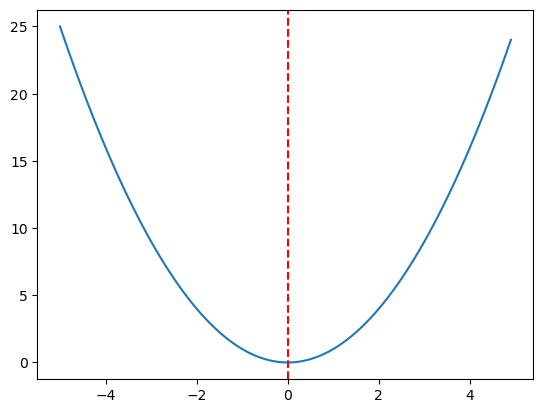

In [58]:
#Lab - 10
from numpy import asarray
from numpy.random import rand
from matplotlib import pyplot
# objective function
def objective(x):
	return 0
 
# define range for input
bounds = asarray([[-5.0, 5.0]])

solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
# evaluate the initial point
solution_eval = objective(solution)

# hill climbing local search algorithm
def hillclimbing(objective, bounds, n_iterations, step_size):
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	solution_eval = objective(solution)
	# run the hill climb
	for i in range(n_iterations):
		# take a step
		candidate = solution + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidte_eval = objective(candidate)
		# check if we should keep the new point
		if candidte_eval <= solution_eval:
			# store the new point
			solution, solution_eval = candidate, candidte_eval
			# report progress
			print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval]


# convex unimodal optimization function
from numpy import arange
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x[0]**2.0
 
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# compute targets
results = [objective([x]) for x in inputs]
# create a line plot of input vs result
pyplot.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
pyplot.axvline(x=x_optima, ls='--', color='red')
# show the plot
pyplot.show()
